<a href="https://colab.research.google.com/github/dhruvsuri8106-code/ECON-3916---Statistical-and-Machine-Learning/blob/main/Lab%203%20/%20Lab_3_Benchmarking_Development_with_WBGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wbgapi

In [2]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [69]:
country_codes = ['MAR', 'LMC', 'WLD']

In [6]:
indicators = {'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
              }

In [45]:
df_original = wb.data.DataFrame(indicators, country_codes, time=range(1991,2025))

In [46]:
df = df_original.T
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df.rename(columns=indicators,level=1, inplace=True)
df_MAR = df.xs('MAR', level=0, axis=1).copy()

In [47]:
df

economy           LMC                                                          \
series  Inflation_CPI Tax_Rev_GDP Gov_Exp_GDP Exports_GDP Gross_Cap_Formation   
Year                                                                            
1991        13.224266         NaN   13.020421   16.428707           24.144248   
1992        10.098967         NaN   13.205182   17.321273           25.943503   
1993         9.168662         NaN   12.972910   17.991750           23.284875   
1994        12.368194         NaN   11.894120   18.007534           25.011217   
1995        10.209046         NaN   11.298835   18.280677           24.632403   
1996         9.098809         NaN   10.815602   17.672139           21.194788   
1997         7.106167         NaN   11.091247   18.118792           22.196356   
1998         8.818586         NaN   11.168033   17.404569           21.936929   
1999         4.865398         NaN   12.927396   20.204194           27.354231   
2000         4.088763         NaN   12.484900   21.029190           24.296243   
2001         4.419772         NaN   12.243549   20.943845           26.570119   
2002         3.750175   10.338562   11.986659   21.415476           26.099899   
2003         5.151902   10.565031   11.799319   21.924377           26.831488   
2004         4.474993   11.037035   11.264256   24.044589           29.410879   
2005         5.378876   11.475484   11.076333   25.678206           30.416959   
2006         6.156876   12.584878   10.727528   26.562630           30.603830   
2007         6.936215   13.148058   10.706891   26.434993           33.373859   
2008        11.403427   12.636467   10.881984   28.549224           31.304831   
2009         4.388676   11.472136   11.900667   24.600259           32.258601   
2010         4.845519   11.654214   11.456241   25.523919           32.578919   
2011         6.381096   11.645349   11.598242   27.215470           31.727787   
2012         5.981721   11.873644   11.466404   26.463999           30.530472   
2013         5.496144   11.821385   11.367610   26.242231           28.170155   
2014         5.194010   11.303507   11.215349   24.625777           28.425455   
2015         3.324371   11.579615   11.264920   22.632328           28.017661   
2016         3.371530   11.686792   11.302262   22.100187           28.125388   
2017         3.520257   11.782282   11.372028   23.360349           29.587323   
2018         4.291591   12.301680   11.259109   24.686280           30.471242   
2019         3.464281         NaN   10.921870   23.321628           27.970772   
2020         4.871674         NaN   11.534778   22.206753           26.401989   
2021         4.159197         NaN   11.051389   24.606208           28.864276   
2022         7.670206         NaN   10.702096   27.083638           29.968086   
2023         7.382814         NaN   10.870829   26.529980           30.162671   
2024         4.606211         NaN   10.959964   27.202123           30.528188   

economy                                                                   \
series  Imports_GDP     GDP_Const GDP_Per_Capita_Const Gross_Dom_Savings   
Year                                                                       
1991      19.165455  1.479092e+12           844.047445         16.304103   
1992      20.504905  1.533546e+12           855.381561         14.577251   
1993      21.449768  1.568591e+12           855.440096         14.235534   
1994      21.018374  1.632015e+12           870.576193         18.186535   
1995      21.678080  1.716517e+12           895.911945         22.700868   
1996      21.056968  1.826896e+12           933.262881         24.140551   
1997      21.575534  1.900860e+12           950.701481         24.281238   
1998      20.759219  1.987505e+12           973.431113         25.319629   
1999      23.497175  2.095146e+12          1005.350543         13.529691   
2000      23.523005  2.183347e+12          1026.703806         14.525573   
2001      23.5

In [58]:
df_MAR['Natural_Rate_Unemp'] = df_MAR['Unemployment_Rate'].rolling(window=5).mean()
df_MAR['GDP_per_cap'] = df_MAR['GDP_Const']/df_MAR['Labor_Force_Total']
df_MAR ['Net_outflow'] = df_MAR['Exports_GDP'] - df_MAR['Imports_GDP']
df_MAR['Budget_Balance'] = df_MAR['Tax_Rev_GDP'] - df_MAR['Gov_Exp_GDP']

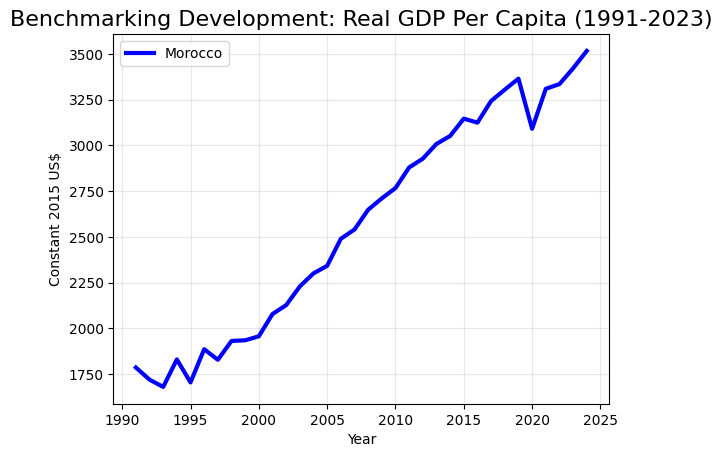

In [74]:
plt.plot(df.index, df[('MAR', 'GDP_Per_Capita_Const')], label='Morocco', color='blue', linewidth=3)
#using 1991 because it is the first year Moroccan unemployment data became available
plt.title('Benchmarking Development: Real GDP Per Capita (1991-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

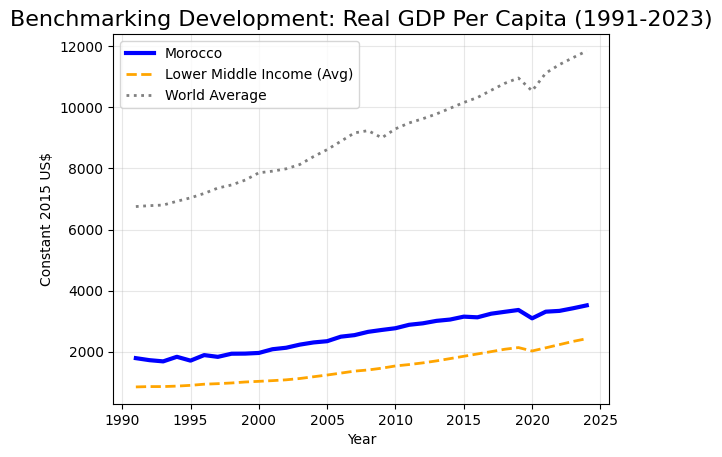

In [73]:
plt.plot(df.index, df[('MAR', 'GDP_Per_Capita_Const')], label='Morocco', color='blue', linewidth=3)
plt.plot(df.index, df[('LMC', 'GDP_Per_Capita_Const')], label='Lower Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)
#using 1991 because it is the first year Moroccan unemployment data became available
plt.title('Benchmarking Development: Real GDP Per Capita (1991-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

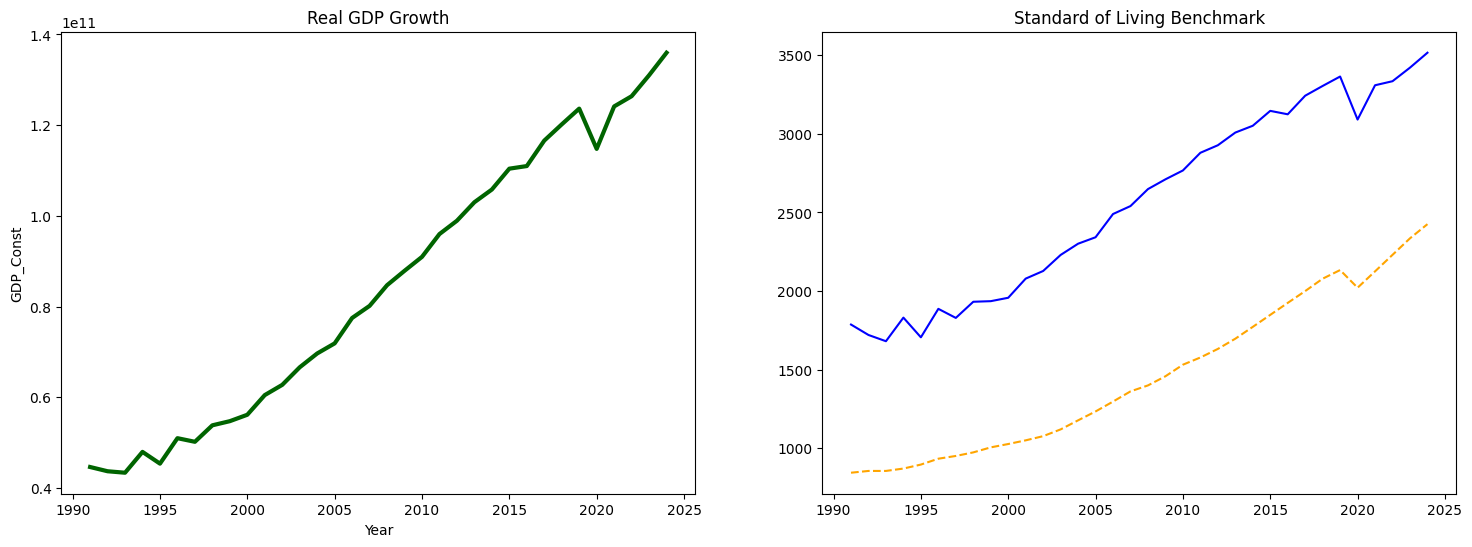

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_MAR, x=df_MAR.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('MAR', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('LMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()


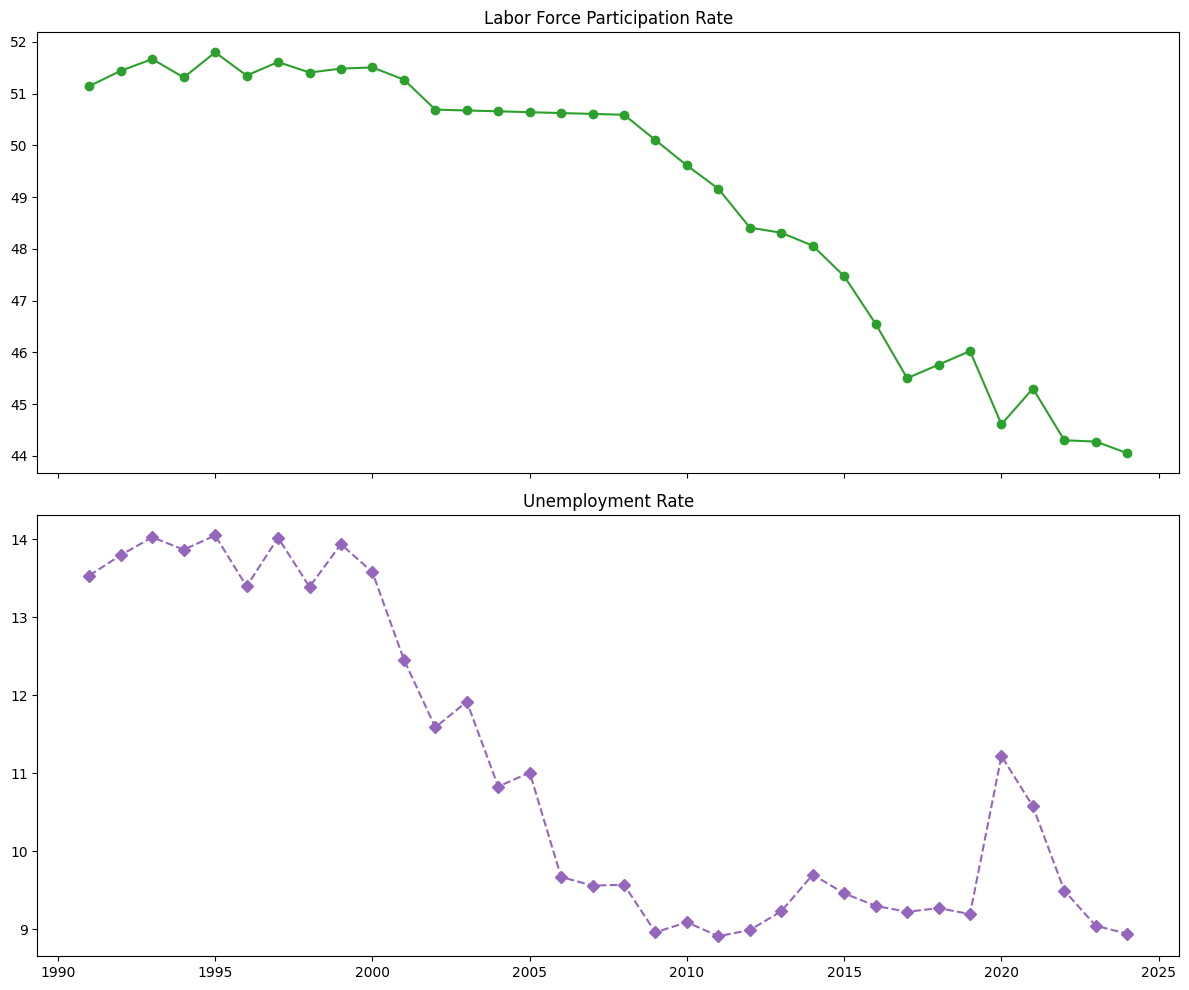

In [79]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_MAR.index, df_MAR['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_MAR.index, df_MAR['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

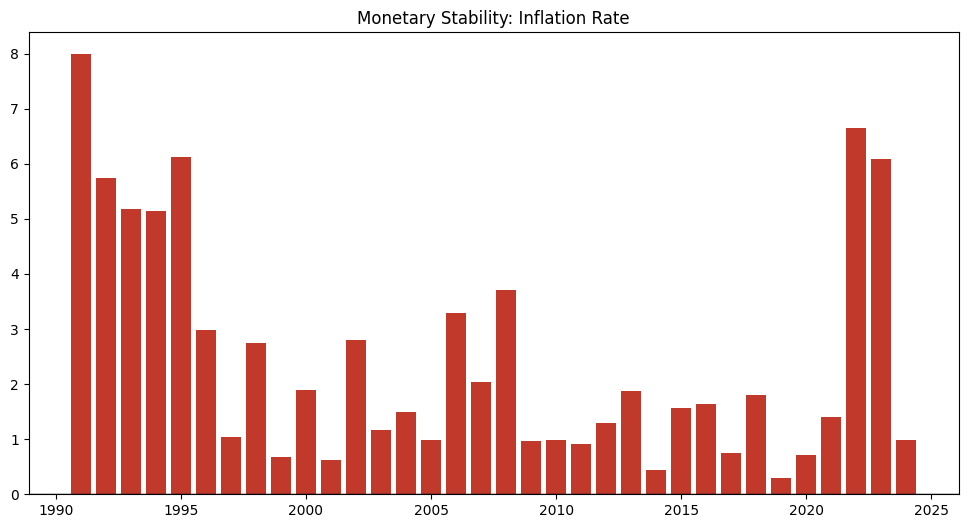

In [80]:
plt.figure(figsize=(12, 6))

plt.bar(df_MAR.index, df_MAR['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

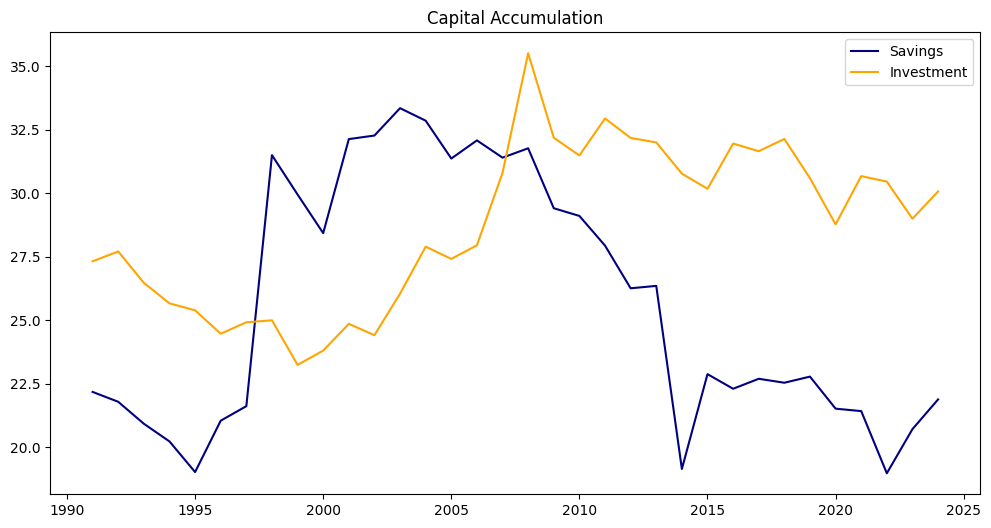

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(df_MAR.index, df_MAR['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_MAR.index, df_MAR['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

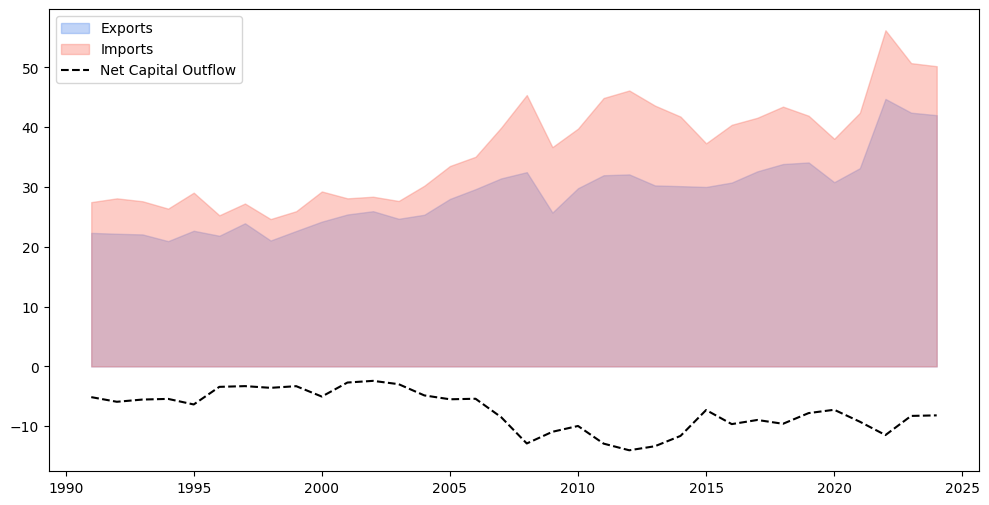

In [85]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_MAR.index, df_MAR['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_MAR.index, df_MAR['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_MAR.index, df_MAR['Net_outflow'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

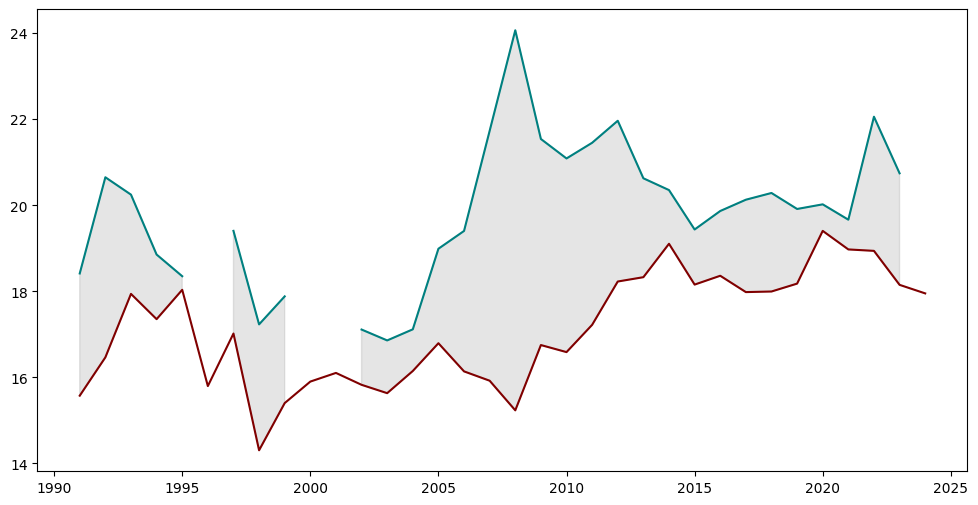

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(df_MAR.index, df_MAR['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_MAR.index, df_MAR['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_MAR.index, df_MAR['Tax_Rev_GDP'], df_MAR['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()
